In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline  
import emcee
import math
import matplotlib
import scipy.optimize as op

hfont = {'fontname':'Times New roman'}
mg2color = [107/256.0, 70/256.0, 177/256.0]




binning by SN   --- human_acceptance_false_results_final.fits

for all equivalent widths inserted   ---

    minSN    maxSN  inserted_number discovered_number  RATIO_discovered/inserted
    
      0.00000      1.00000        123.00     		2.000   0.01626016
      1.00000      2.00000        167.00     		4.000   0.0239521       
      2.00000      3.00000        177.00     		5.000   0.02824859
      3.00000      4.00000        185.00     		7.000   0.03783784
      4.00000      5.00000        221.00     	   11.000   0.04977376
      5.00000      6.00000        182.00     		7.000   0.03846154
      6.00000      8.00000        162.00     		5.000   0.0308642 
      8.00000      10.0000        119.00     		1.000   0.00840336
			
		




  

In [2]:
# pass the values to arrays
min_sn = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0])
max_sn = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0])
value = np.array([0.01626016, 0.0239521  , 0.02824859, 0.03783784, 0.04977376, 0.03846154, 0.0308642,  0.00840336])

mid_sn = 0.5*(max_sn - min_sn) + min_sn

print(mid_sn)

[ 0.5  1.5  2.5  3.5  4.5  5.5  7.   9. ]


In [3]:
n  = np.array([123.00, 167.00, 177.00,  185.00,  22.001,  182.00,  162.00, 119.00])
ns = np.array([2.00, 4.00, 5.00,  7.00,  11.00,  7.00,  5.00, 1.00])
ratio = ns/n
print(ratio)
nf = n - ns
z = 1.96

error = z*pow(ns*nf/n, 0.5)/100.0
print(error)

upper_bound = value + error
lower_bound = value - error
upper_bound[np.where(upper_bound > 1.0)] = 1.0




[ 0.01626016  0.0239521   0.02824859  0.03783784  0.49997727  0.03846154
  0.0308642   0.00840336]
[ 0.02749231  0.03872769  0.04320347  0.05086619  0.04596712  0.0508497
  0.04314529  0.01951747]


/Users/alex/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/alex/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/alex/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/alex/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/alex/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


9597.39365252
-0.003 0.006 0.014
0.007 0.01 0.014


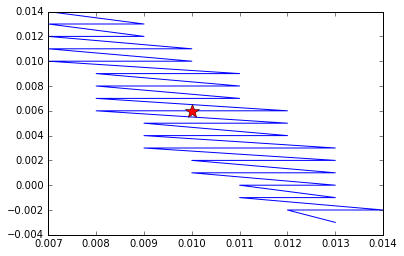

In [4]:
# leave a cell for the fitting process
# m = scalar (0 to 0.15 in 0.001 steps)
# sn = is the signal to noise (the x axis)
# s = is an exponential scale factor (also to be fit for, (0 to 5, in 0.01 steps), from looking at the distribution)
chi2 = np.zeros(300.0*400.0)
inv_sigma2 =  np.zeros(300.0*400.0)
lnlike =  np.zeros(300.0*400.0)
ms = np.zeros(300.0*400.0)
bs = np.zeros(300.0*400.0)

y = np.array([0.0, 0.01626016, 0.0239521  , 0.02824859, 0.03783784, 0.04977376])
x = np.array([0.0, 0.5, 1.5, 2.5, 3.5, 4.])

local_counter = 0
for b in range(0, 400):
    local_b = b/1000.0 - 0.02
    for m in range(0, 300): 
        local_m = m/1000.0

        model = local_b + local_m*x
        chi2[local_counter] = np.sum((model - y)*(model - y))#/yerr/yerr)
        ms[local_counter] = local_m
        bs[local_counter] = local_b
        local_counter = local_counter + 1
       

chi2scale = 1./min(chi2)
chi2_adjusted = chi2*chi2scale
best_ms = ms[np.where((chi2_adjusted < 2.706))]
best_bs = bs[np.where((chi2_adjusted < 2.706))]
mms = ms[np.where((chi2_adjusted == min(chi2_adjusted)))]
bbs = bs[np.where((chi2_adjusted == min(chi2_adjusted)))]


print(chi2scale)
print(min(best_bs), bbs[0], max(best_bs))
print(min(best_ms), mms[0], max(best_ms))

#plt.plot(ms, bs)
plt.plot(best_ms, best_bs)
plt.plot(mms, bbs, 'r*',markersize=15 )

/Users/alex/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/alex/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/alex/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/alex/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/alex/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


51234.0104935
0.082 0.09 0.099
-0.01 -0.009 -0.008


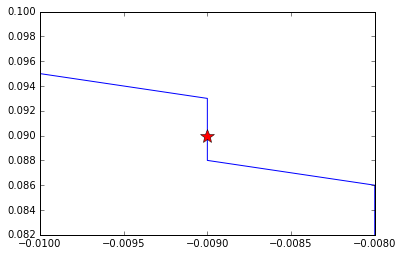

In [5]:
# leave a cell for the fitting process
# triangular function where
# fit_function = mx + b
# in 2 steps
# m = scalar (0 to 0.15 in 0.001 steps)
# sn = is the signal to noise (the x axis)
# s = is an exponential scale factor (also to be fit for, (0 to 5, in 0.01 steps), from looking at the distribution)
chi2 = np.zeros(300.0*400.0)
inv_sigma2 =  np.zeros(300.0*400.0)
lnlike =  np.zeros(300.0*400.0)
ms = np.zeros(300.0*400.0)
bs = np.zeros(300.0*400.0)
x = np.array([ 4.5, 5.5 , 7.  , 9. ])
y = np.array([ 0.04977376, 0.03846154, 0.0308642,  0.00840336])

local_counter = 0
for m in range(0, 300): 
    local_m = m/-1000.0
    for b in range(0, 400):
        local_b = b/1000.0 - 0.002

        model = local_m*x + local_b
        chi2[local_counter] = np.sum((model - y)*(model - y))#/yerr/yerr)
        ms[local_counter]   = local_m
        bs[local_counter]   = local_b
        local_counter = local_counter + 1
    
chi2scale = 1./min(chi2)
chi2_adjusted = chi2*chi2scale
best_ms = ms[np.where((chi2_adjusted < 2.706))]
best_bs = bs[np.where((chi2_adjusted < 2.706))]
mms = ms[np.where((chi2_adjusted == min(chi2_adjusted)))]
bbs = bs[np.where((chi2_adjusted == min(chi2_adjusted)))]


print(chi2scale)
print(min(best_bs), bbs[0], max(best_bs))
print(min(best_ms), mms[0], max(best_ms))

#plt.plot(ms, bs)
plt.plot(best_ms, best_bs)
plt.plot(mms, bbs, 'r*',markersize=15 )

In [6]:
# below best_fit = 0.01*x + 0.006
# above best_fit = -0.009*x + 0.09

common_x = (0.09 - 0.006)/(0.01 + 0.009)
print(common_x)

4.421052631578947


[ 0.006       0.011       0.021       0.031       0.05021053]
[ 0.03778947  0.037       0.027       0.012      -0.008      -0.02      ]
[ 0.5  1.5  2.5  3.5  4.5  5.5  7.   9. ] [ 0.01626016  0.0239521   0.02824859  0.03783784  0.04977376  0.03846154
  0.0308642   0.00840336]


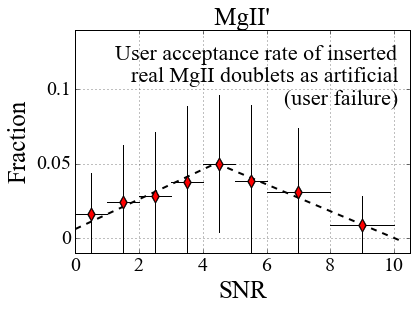

In [9]:
common_x = 4.421052631578947
# plot the data
# x, y labels and title
plt.ylabel('Fraction', **hfont,  fontsize=25)
plt.xlabel('SNR', **hfont,  fontsize=25)
plt.title(" MgII' ", **hfont,  fontsize=25)

# x and y ranges and scale
plt.xlim([-0.01, 10.5])
plt.ylim([-0.01, 0.14])

# x and y ticks
xlabels = ['0', '2', '4', '6', '8', '10']
plt.xticks([0, 2, 4, 6, 8, 10], 
            xlabels, **hfont, fontsize = 20)
ylabels = ['0', '0.05', '0.1']
plt.yticks([0, 0.05, 0.1], 
            ylabels, **hfont, fontsize = 20)

plt.grid(True)


# my fits below sn 4
# -0.003 0.006 0.014
# 0.007 0.01 0.014
x = np.array([0, 0.5, 1.5, 2.5, common_x])
fit_below = 0.007*x - 0.003
fit_above = 0.014*x + 0.014
best_fit = 0.01*x + 0.006
#plt.fill_between(x, fit_below, fit_above, color = 'r', alpha = 0.2)
plt.plot(x, best_fit, 'k--', lw = 2, alpha = 1)
print(best_fit)

# my fits above sn 4
#0.082 0.09 0.099
# -0.01 -0.009 -0.008
x = np.array([common_x, 4.5, 5.5, 7.0, 9.0, 10.2])
fit_below = -0.01*x + 0.082
fit_above = -0.008*x + 0.099
best_fit = -0.009*x + 0.09
#plt.fill_between(x, fit_below, fit_above, color = 'r', alpha = 0.2)
plt.plot(x, best_fit, 'k--', lw = 2, alpha = 1)
print(fit_below)


# plot the vertical error bounds    
for i in range(0, len(min_sn)):
    plt.plot([mid_sn[i], mid_sn[i]], [upper_bound[i], lower_bound[i]], 'k-', lw=1.0)

# plot the horizontal bounds    
for i in range(0, len(min_sn)):
    plt.plot([min_sn[i], max_sn[i]], [value[i], value[i]], 'k-', lw=1.0)

    
# plot the results
plt.plot(mid_sn, value, 'kd', markersize=10, alpha=1.0)  
plt.plot(mid_sn, value, 'd', markersize=8, color = 'r', alpha=1.0)   

print(mid_sn, value)
# output a label
txt = plt.text(1.25, 0.12, "User acceptance rate of inserted", **hfont,  fontsize=22)
txt = plt.text(1.75, 0.105, "real MgII doublets as artificial", **hfont,  fontsize=22)
txt = plt.text(6.55, 0.09, "(user failure)", **hfont,  fontsize=22)


plt.savefig('mg2_acceptance_real_as_artificial.png', bbox_inches='tight', figsize=[24,12], dpi=500)

In [10]:
pwd


'/Users/alex/Desktop/final_files/correct_precision/corrections_paper1'